In [5]:
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [3]:
digits=load_digits()
x, y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis, x, y, train_sizes=np.linspace(0.1,1.0,5), cv=10,
                                                      scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)
mean_train=np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)
mean_test=np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)

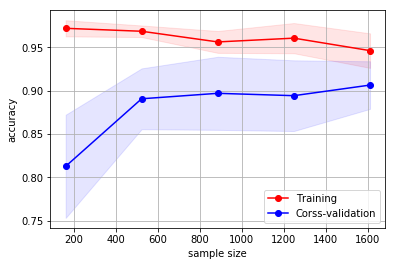

In [10]:
plt.plot(train_size, mean_train, 'ro-', label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
plt.plot(train_size, mean_test, 'bo-', label='Corss-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints=1)
plt.show()

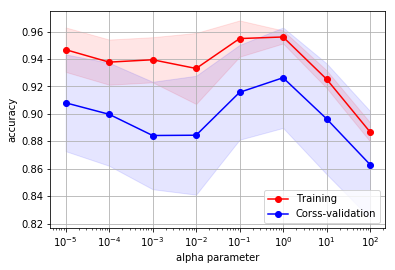

In [11]:
testing_range=np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, x, y, param_name='alpha', param_range=testing_range, cv=10,
                                                      scoring='accuracy', n_jobs=-1)
mean_train=np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)
mean_test=np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)

plt.semilogx(testing_range, mean_train, 'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.semilogx(testing_range, mean_test, 'bo-', label='Corss-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('alpha parameter')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints=1)
plt.show()